In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [53]:
# Cargar el dataset
df = pd.read_csv("C:/Users/nayle/Documents/Maestria UTP/Modelos predictivos/archive (2)/Customer-Churn-Records.csv")


In [23]:
# Seleccionar variables de interés
columns_to_use = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", 
                  "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited", "Complain", 
                  "Satisfaction Score", "Card Type", "Point Earned"]
df = df[columns_to_use]

In [24]:
# Exploración inicial
display(df.head())
display(df.info())
display(df.describe())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [55]:
# Usamos LabelEncoder para variables binarias
label_encoders = {}
for col in ["Gender", "HasCrCard", "IsActiveMember", "Complain"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos el encoder en caso de necesitarlo luego
    
# Aplicamos One-Hot Encoding a variables con más de 2 categorías
df_mode = pd.get_dummies(df, columns=["Geography", "Card Type"], drop_first=True)

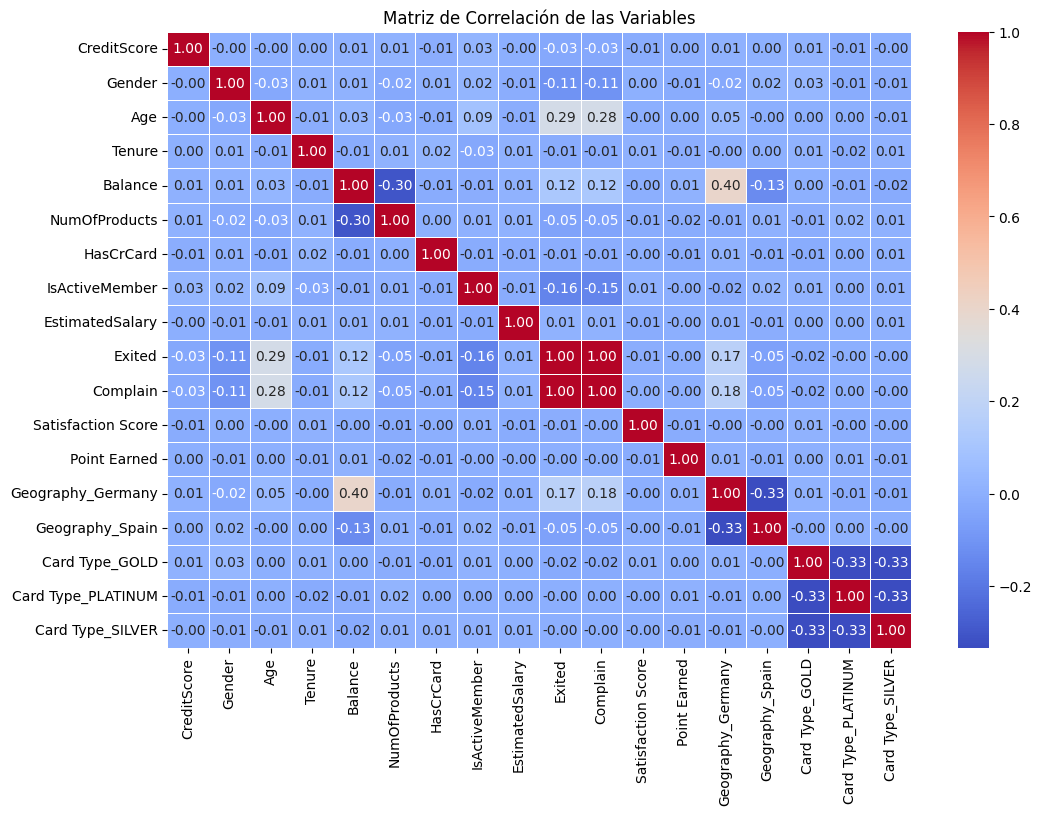

In [26]:
# 📌 4️⃣ Visualizar la Matriz de Correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_mode.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación de las Variables")
plt.show()

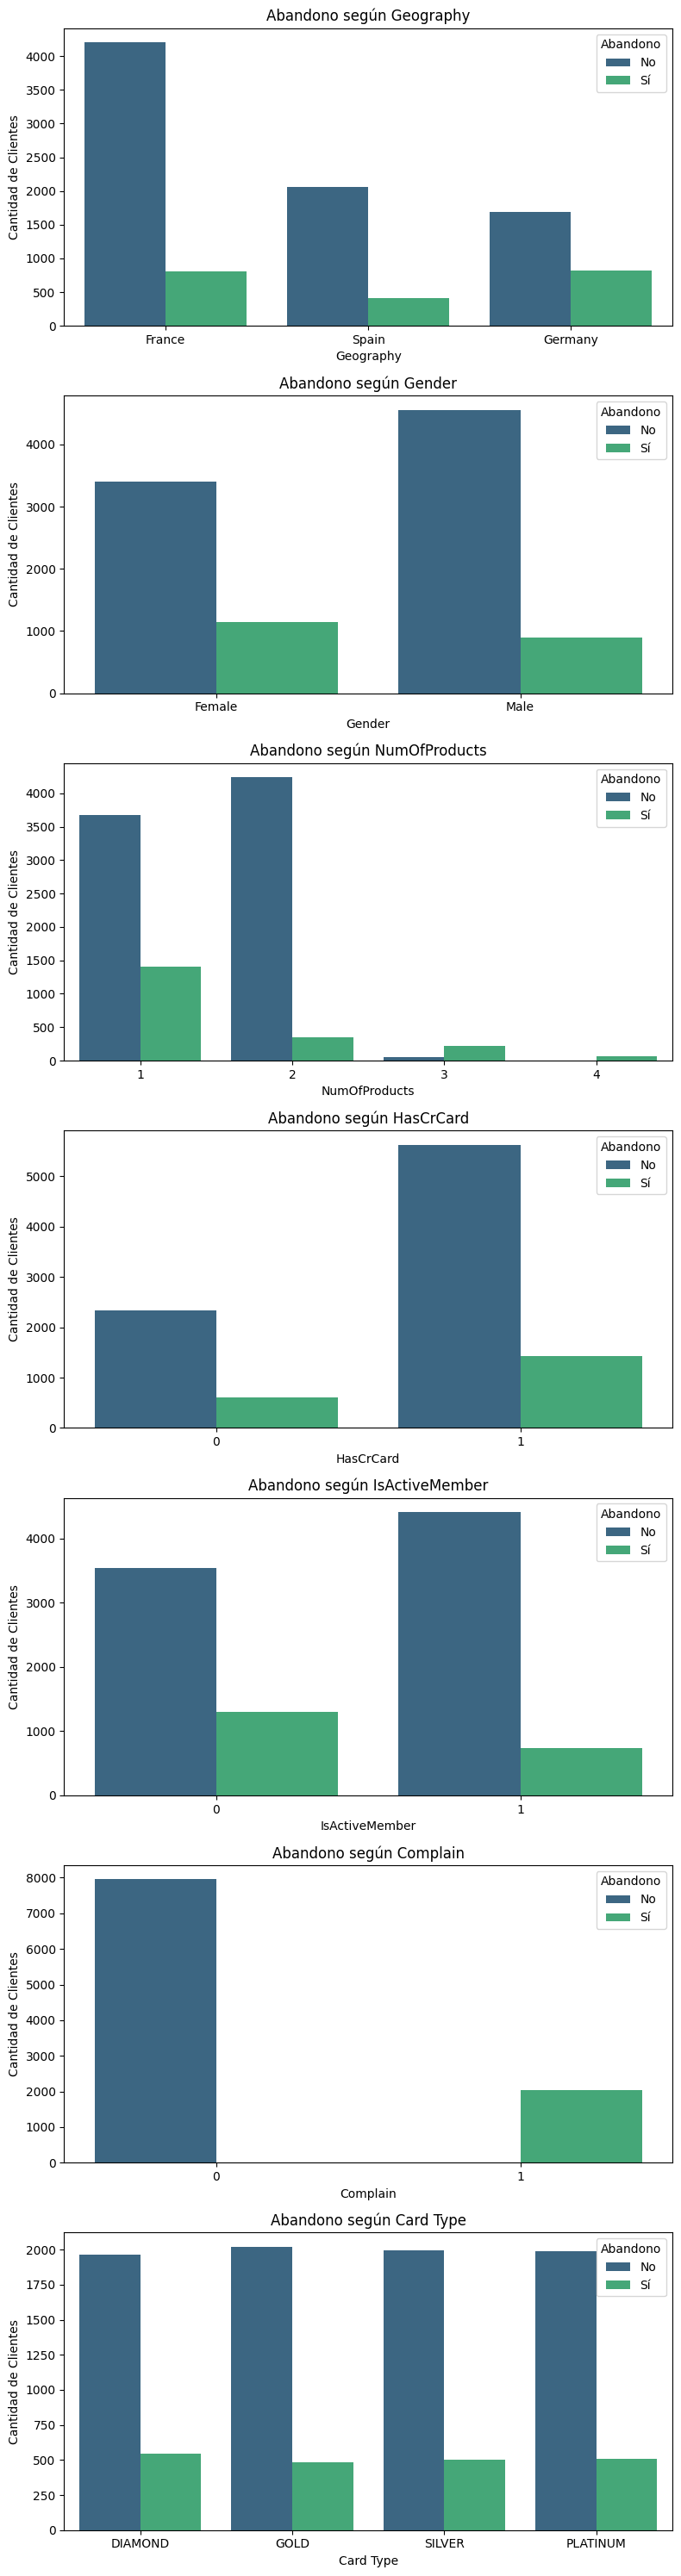

In [54]:
# Definir las variables a analizar
variables_categoricas = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Complain", "Card Type"]
variables_numericas = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "Satisfaction Score", "Point Earned"]

# Crear un grid de subgráficos para las variables categóricas
fig, axes = plt.subplots(nrows=len(variables_categoricas), figsize=(8, 30))

for i, var in enumerate(variables_categoricas):
    sns.countplot(data=df, x=var, hue="Exited", palette="viridis", ax=axes[i])
    axes[i].set_title(f"Abandono según {var}")
    axes[i].set_ylabel("Cantidad de Clientes")
    axes[i].legend(title="Abandono", labels=["No", "Sí"])

plt.tight_layout()
plt.show()

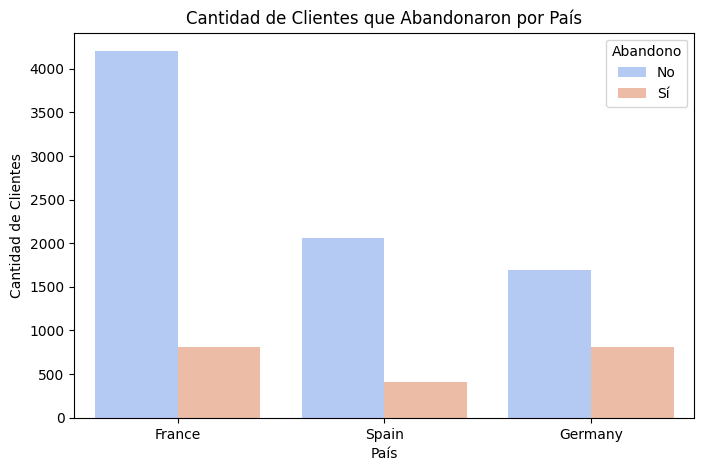

In [29]:

# Análisis de abandono por país
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Geography", hue="Exited", palette="coolwarm")
plt.title("Cantidad de Clientes que Abandonaron por País")
plt.xlabel("País")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.show()


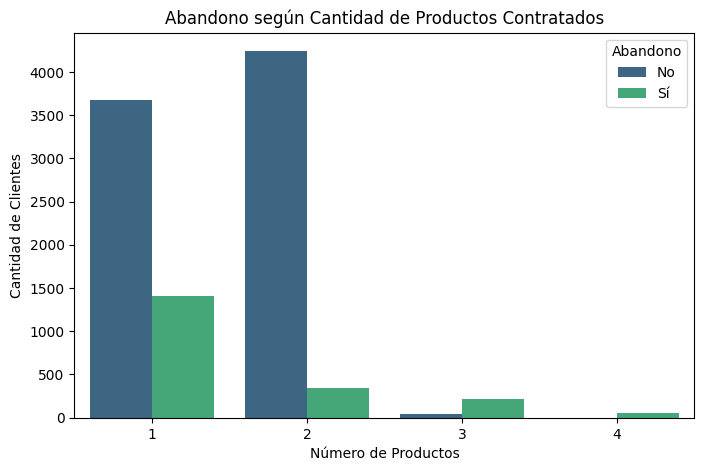

In [32]:
# Análisis de abandono por número de productos
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="NumOfProducts", hue="Exited", palette="viridis")
plt.title("Abandono según Cantidad de Productos Contratados")
plt.xlabel("Número de Productos")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.show()

In [ ]:
features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", 
            "IsActiveMember", "EstimatedSalary", "Complain", "Satisfaction Score", 
            "Point Earned", "Geography_Germany", "Geography_Spain", 
            "Card Type_GOLD", "Card Type_PLATINUM", "Card Type_SILVER"]

X = df_mode[features]  # Variables independientes
y = df_mode["Exited"]  # Variable objetivo (abandono)

# Ver la forma de los datos finales
print("Tamaño del dataset de características:", X.shape)
print("Tamaño del dataset objetivo:", y.shape)

Tamaño del dataset de características: (10000, 16)
Tamaño del dataset objetivo: (10000,)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características y variable objetivo
X = df_mode.drop("Exited", axis=1)
y = df_mode["Exited"]

#X = df_mode.drop(["Exited", "Complain"], axis=1)
#y = df_mode["Exited"]
# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado para algunos modelos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [48]:
# %% [markdown]
# ### Modelo: Regresión Logística
# Se utiliza StandardScaler, por lo que se entrenará con X_train_scaled y se evaluará con X_test_scaled.

# %%
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

# Crear y entrenar el modelo
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)

# Evaluación
print("📌 Regresión Logística:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

# Cálculo de métricas complementarias
acc_lr = accuracy_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Accuracy: {acc_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")



📌 Regresión Logística:
Matriz de Confusión:
[[1606    1]
 [   1  392]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9990
MSE: 0.0010
R²: 0.9937


In [49]:
# ### Modelo: Random Forest
# No se requiere escalado; se trabaja con X_train y X_test directamente.

# %%
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("📌 Random Forest:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Cálculo de métricas complementarias
acc_rf = accuracy_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Accuracy: {acc_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")



📌 Random Forest:
Matriz de Confusión:
[[1606    1]
 [   1  392]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9990
MSE: 0.0010
R²: 0.9937


In [50]:
# ### Modelo: XGBoost
# Se utiliza XGBoost para clasificación; se trabaja con los datos no escalados (X_train, X_test).

# %%
from xgboost import XGBClassifier

# Crear y entrenar el modelo
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación
print("📌 XGBoost:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# Cálculo de métricas complementarias
acc_xgb = accuracy_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Accuracy: {acc_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"R²: {r2_xgb:.4f}")



📌 XGBoost:
Matriz de Confusión:
[[1606    1]
 [   1  392]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9990
MSE: 0.0010
R²: 0.9937


c:\Users\nayle\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:53:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
